### Clustering - Pair Trading Strategy
SP 500 dataset from Jan 2020 to September 2022
Also not Financial Advice, This is for educational purposes only. I am not responsible for anyone's gains/losses from this project.

The main objective of this analysis is to explore the Unsupervised Learning techniques learned throughout the Unsupervised Machine Learning course. In this project, I will perform clustering analysis on the S&P500 with a pair trading strategy using data extracted from YahooFinance and Pandas DataReader.

In [1]:
import pandas as pd
import pandas_datareader as pdr

In [2]:
import urllib.request as urlrq
import certifi
import ssl

In [3]:
# req = urlrq.urlopen('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies', context=ssl.create_default_context(cafile=certifi.where()))
# wiki = pd.read_html(req)
# tickers = wiki[0][1:]['Symbol'].tolist()
# value = []
# for ticks in tickers:
#     try:
#         price = pdr.DataReader(ticks,'yahoo','01/01/2020')['Close']
#         dataf = pd.DataFrame(price)
#         dataf.columns = [ticks]
#         value.append(dataf)
#     except:
#         pass
#     df = pd.concat(value,axis=1)
# # This process took me 20 min and 29 seconds...

In [4]:
# df.sort_index(inplace=True)
# df.to_csv('SP500_Jan2019_Sep2022.csv')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn import cluster, covariance, manifold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import cophenet, dendrogram, fcluster, linkage

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn import metrics

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('SP500_Jan2020_Sep2022.csv', index_col='Date') 

In [8]:
df.head(3)

,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,47.770000,86.949997,89.550003,168.809998,210.149994,58.650002,46.110001,334.429993,170.320007,159.410004,...,204.279999,344.709991,143.600006,62.380001,79.849998,102.169998,259.140015,144.854370,52.439999,134.139999
2020-01-03,47.349998,85.889999,88.699997,166.820007,209.800003,58.669998,46.020000,331.809998,169.960007,159.419998,...,204.330002,340.660004,141.470001,62.680000,80.320000,101.849998,256.049988,144.475723,51.700001,134.160004
2020-01-06,47.650002,86.339996,89.400002,179.039993,208.429993,59.740002,45.660000,333.709991,170.190002,156.800003,...,204.580002,337.489990,141.190002,62.590000,79.800003,101.790001,258.010010,143.640778,51.070000,133.130005


In [9]:
pd.options.display.width = 100
pd.options.display.max_rows = 500
pd.options.display.precision = 3

In [10]:
df.head(2)

,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,47.77,86.95,89.55,168.81,210.15,58.65,46.11,334.43,170.32,159.41,...,204.28,344.71,143.60,62.38,79.85,102.17,259.14,144.854,52.44,134.14
2020-01-03,47.35,85.89,88.70,166.82,209.80,58.67,46.02,331.81,169.96,159.42,...,204.33,340.66,141.47,62.68,80.32,101.85,256.05,144.476,51.70,134.16


In [11]:
df.shape

(694, 500)

### Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 2020-01-02 to 2022-10-03
Columns: 500 entries, AOS to ZTS
dtypes: float64(500)
memory usage: 2.7+ MB


In [13]:
df.describe()

,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,694.000,694.000,694.000,694.000,694.000,694.000,694.000,694.000,694.000,694.000,...,694.000,694.000,694.000,694.000,694.000,694.000,694.000,694.000,694.000,694.000
mean,59.769,110.361,114.263,280.387,273.936,78.716,60.191,469.853,189.032,178.493,...,215.778,414.837,91.798,67.824,95.917,109.762,386.487,132.840,49.807,170.025
std,11.683,14.333,23.577,55.920,57.467,10.857,16.678,96.710,34.532,35.768,...,19.904,80.619,23.926,4.255,20.022,15.518,124.246,18.747,12.654,28.049
min,34.750,62.820,64.500,130.510,143.690,52.050,29.310,275.200,109.070,75.030,...,147.560,209.490,43.020,50.000,56.640,56.520,161.510,78.282,24.080,92.660
25%,50.630,102.155,95.155,257.932,228.923,74.722,46.055,397.885,161.573,152.565,...,203.647,353.815,73.310,64.952,81.668,99.102,275.470,117.845,38.307,155.080
50%,59.190,111.170,109.410,292.660,279.470,79.110,59.355,465.500,195.015,181.710,...,211.990,417.695,86.500,68.200,91.855,112.655,376.390,132.816,52.895,165.305
75%,68.405,120.477,135.870,321.680,318.502,83.430,71.480,514.188,214.778,207.595,...,230.822,477.405,109.128,70.463,113.908,120.580,501.717,146.471,58.130,191.365
max,85.850,141.460,174.960,376.200,415.420,103.810,98.220,688.370,260.940,241.910,...,270.070,585.570,152.210,77.410,138.030,138.860,614.550,173.408,74.310,247.030


### Data Cleaning

In [14]:
df.isnull().values.any()

True

In [15]:
df = df.dropna() #Can't really impute, since CARR and CEG started out late

In [16]:
df.isnull().values.any()

False

### Feature Engineering

Annual returns and variances will be set as variables, since they are the indicators of the stock performance and its' volatility

In [17]:
df.columns

Index(['AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP',
       ...
       'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', length=500)

In [19]:
annual_returns = df.pct_change().mean()*252
annual_returns = pd.DataFrame(annual_returns)

In [20]:
annual_returns.columns

RangeIndex(start=0, stop=1, step=1)

In [21]:
annual_returns.columns= ['Returns']

In [22]:
annual_returns['Volatility'] = df.pct_change().std()*np.sqrt(252)
data = annual_returns

### Standard Scaling
We scale all the variables on the same scaling before clustering, else features with larger values will heavily influence the result leading to bias... mean=0, variance=1

In [23]:
scaler = StandardScaler()
scaler.fit(data)
scaled_transform = scaler.transform(data)
scaled_data = pd.DataFrame(scaled_transform, columns=data.columns, index=data.index)

In [24]:
scaled_data.head(5)

,Returns,Volatility
AOS,-1.131,-0.411
ABT,-0.267,-0.840
ABBV,0.806,-1.066
ABMD,0.268,1.077
ACN,-0.327,-0.419


In [25]:
X = scaled_data

### Model Selection: KMeans and Agglomerative Clustering

K Means: Finding Elbow point and show silhouette score visually...

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [27]:
inertias

[999.9999999999995,
 639.623839488831,
 434.8170763536417,
 312.9564940331125,
 261.28477647848825,
 220.61167070287243,
 191.90012996071485,
 169.32822639386464,
 150.80278631581706]

(1.0, 10.0, 0.0, 1300.0)

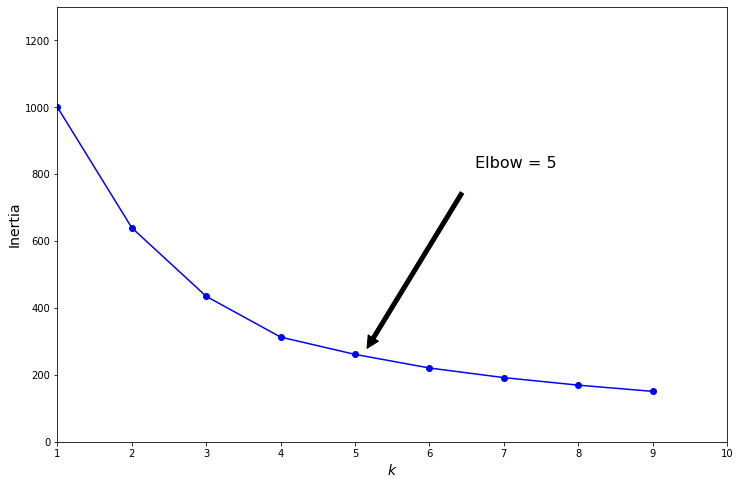

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow = 5',
             xy=(5, inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10, 0, 1300])

In [29]:
inertias[5]

220.61167070287243

We can see that inertia drops very quickly as we increase k up to 4 before it starts to smoothen out. So between 4 to 6 cluster seems like a valid choice to choose for K-Means Clustering. We can similarly view the silhouette score.

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

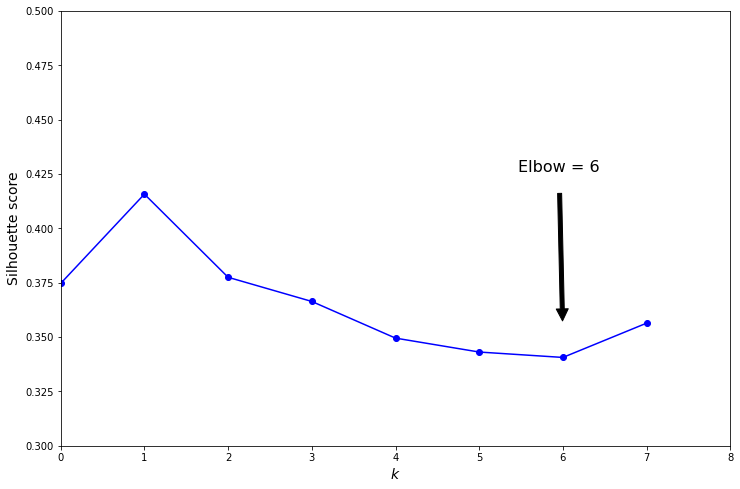

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(range(0, 8), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('Elbow = 6',
             xy=(6, 0.35),
             xytext=(0.6, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([0, 8, 0.3, 0.5])
plt.show()

This should be the elbow point once again. seems like a good amount of clusters. We can visually view the distribution of clusters

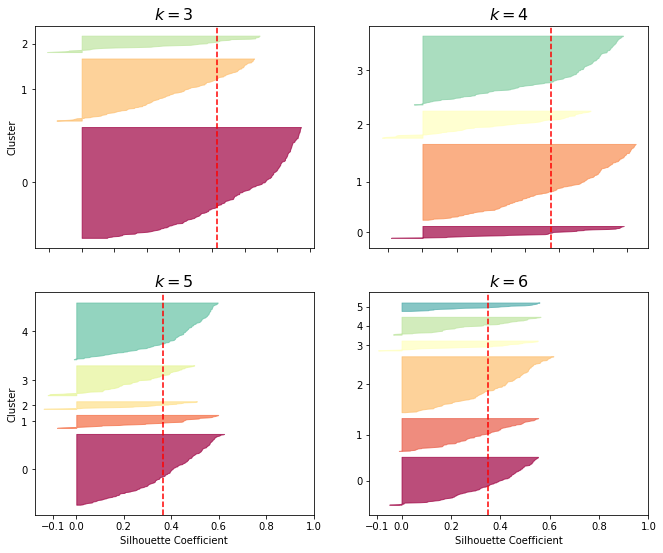

In [33]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

From the silhouette score visualization, we can see that at k=6, the data seems to be distributed quite nicely with their grouping associates. At K=3,4,5 ... We can see that the cluster is terrible. Some of the clusters are either too big, or poorly clustered. It seems like a viable choice to have clusters of similar size that's past the dashed line at K=6.

In [34]:
k_means = KMeans(n_clusters=6)
k_means.fit(X)
target = k_means.predict(X)

Now we can visually see what the model predicted for the clustering.

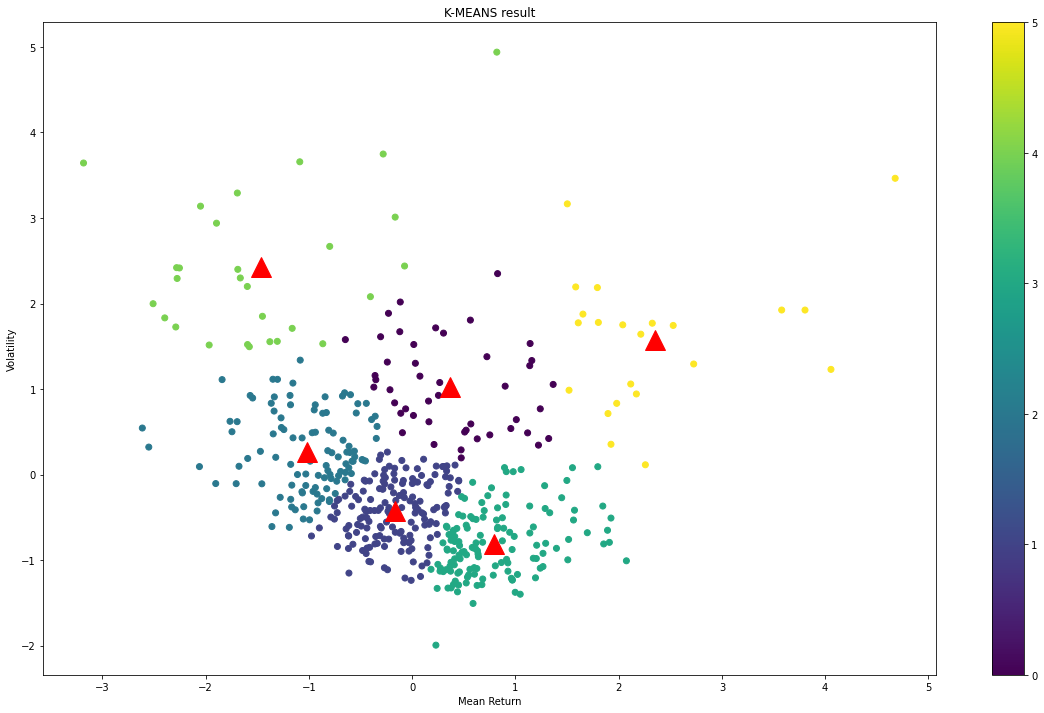

In [35]:
centroid = k_means.cluster_centers_
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap='viridis', label=X.index)
plt.plot(centroid[:,0], centroid[:,1],'^',markersize=20, color='red')
ax.set_title('K-MEANS result')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)


Text(0, 0.5, '# of Cluster')

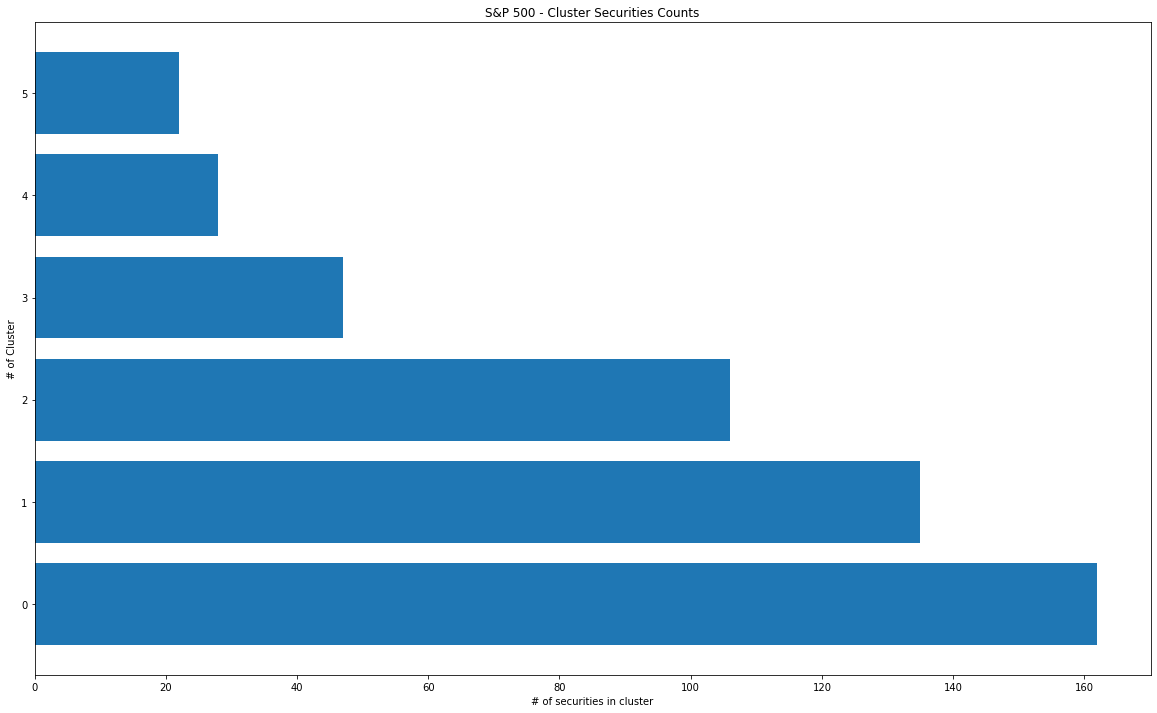

In [36]:
cluster_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = cluster_series[cluster_series != -1]

plt.figure(figsize=(20,12))
plt.barh(range(len(cluster_series.value_counts())), cluster_series.value_counts())
plt.title('S&P 500 - Cluster Securities Counts')
plt.xlabel('# of securities in cluster')
plt.ylabel('# of Cluster')

So we can see that each of these datapoints that are close together are more likly to belong to the same cluster or category. The first cluster shows around 160 securities that may potentially belong in the same sector, same as the other clusters.

### Dendrogram

In [37]:
Z= linkage(X, method='ward')

Text(0.5, 1.0, 'Securities Dendrogram')

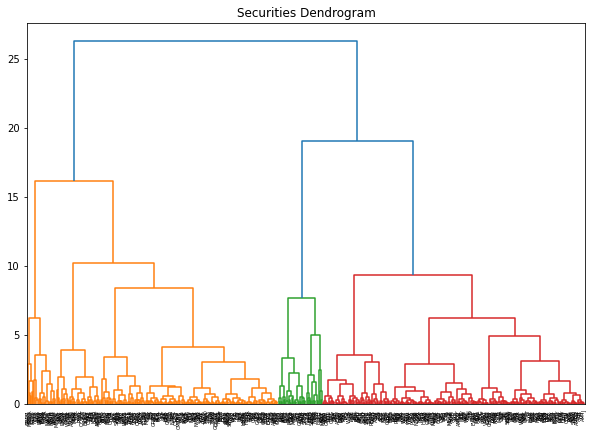

In [38]:
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=X.index)
plt.title('Securities Dendrogram')


The chart represents the number of cluster created for a selected distance threshold. Securities are grouped together into several clusters. With the value of 18, the horizontal line creates 2 verticle branches of dendrogram, which will split into 2 different clusters along with their respective threshold values. We can check the cutoff points by choosing a threshold value.

In [39]:
threshold = 15
clusters = fcluster(Z, threshold, criterion='distance')
pd.DataFrame(data=clusters, columns=['cluster'])['cluster'].unique()

array([2, 4, 3, 1])

So at a threshold value at 15, it splits into 4 clusters

### Agglomerative Clustering

In [40]:
n_clusters = 4
AC = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
AC_cluster = AC.fit_predict(X)

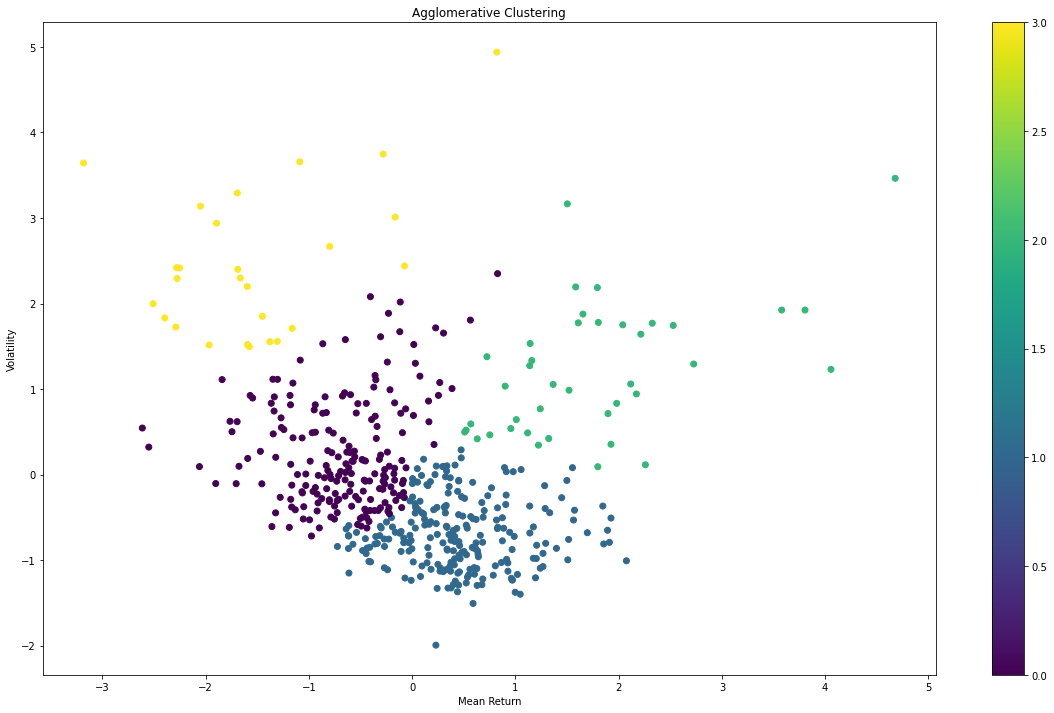

In [41]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=AC_cluster, cmap='viridis')
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

### Affinity Propagation (bonus)

In [42]:
AP = AffinityPropagation()
AP.fit(X)
clust_labels2 = AP.predict(X)

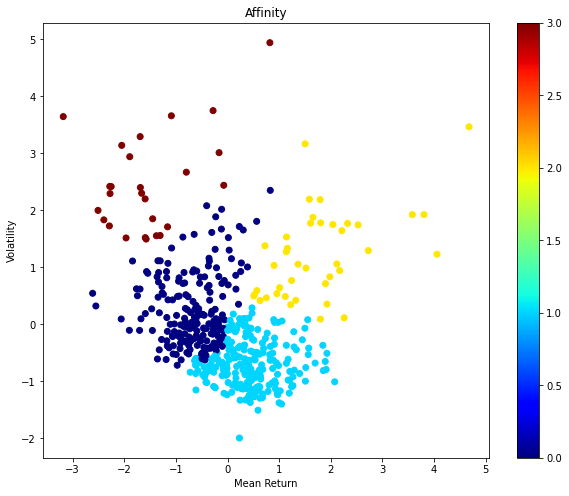

In [43]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =AC_cluster, cmap ="jet")
ax.set_title('Affinity')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

In [44]:
AP_centroid = AP.cluster_centers_indices_
AP_label = AP.labels_


In [45]:
from itertools import cycle

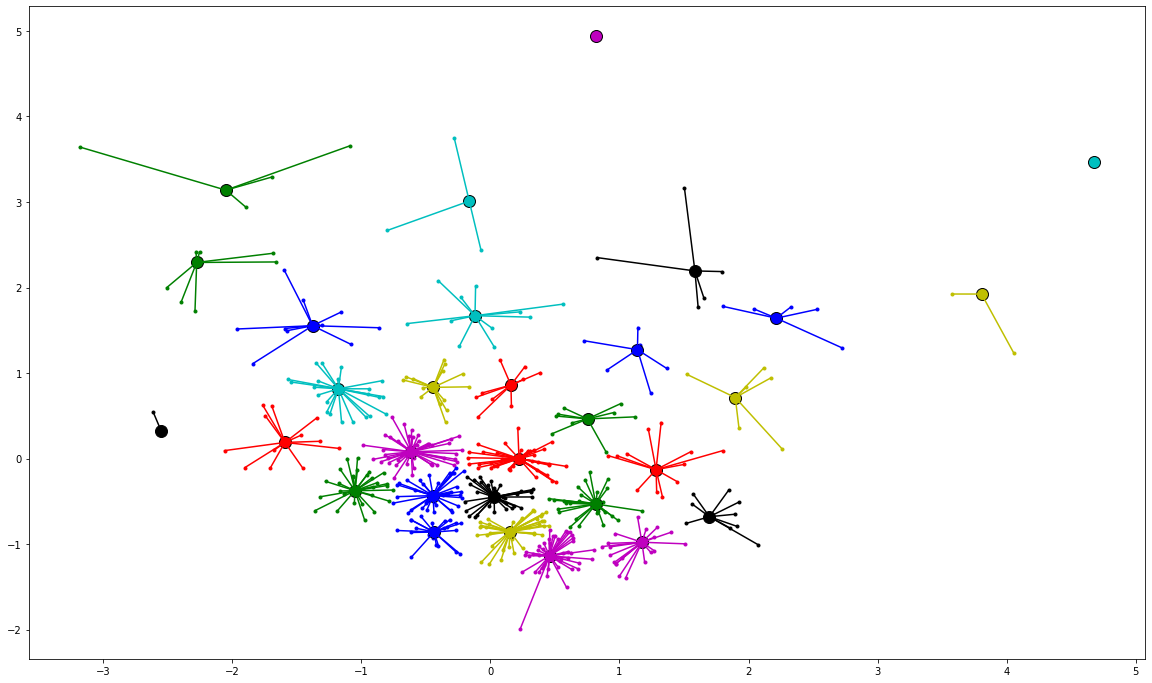

In [46]:
fig = plt.figure(figsize=(20,12))
colors = cycle('bgrcmyk')
for k, col in zip(range(len(AP_centroid)), colors):
    class_member = AP_label == k
    cluster_centroid = np.asarray(X)[AP_centroid[k]]
    plt.plot(np.asarray(X)[class_member,0], np.asarray(X)[class_member,1], col + '.')
    plt.plot(cluster_centroid[0], cluster_centroid[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for i in np.asarray(X)[class_member]:
        plt.plot([cluster_centroid[0], i[0]], [cluster_centroid[1], i[1]], col)


In [47]:
len(AP_centroid)

30

So there are about 30 clusters with the Affinity Propagation

Text(0, 0.5, '# of Clusters')

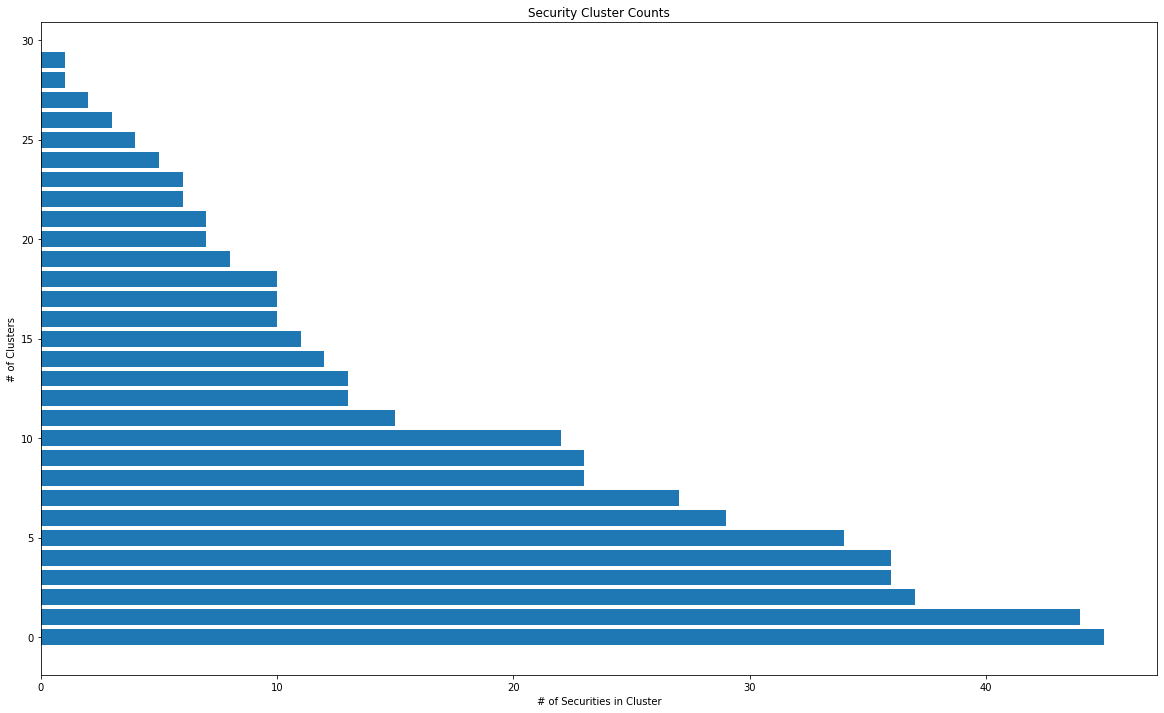

In [48]:
clustered_ap = pd.Series(index=X.index, data=AP_label.flatten())
clustered_ap = clustered_ap[clustered_series != -1]

plt.figure(figsize=(20,12))
plt.barh(range(len(clustered_ap.value_counts())), clustered_ap.value_counts())
plt.title('Security Cluster Counts')
plt.xlabel('# of Securities in Cluster')
plt.ylabel('# of Clusters')



Like the K means, we have around 45 securities belonging in 1 cluster with the datapoints being near each other. A total of 30 clusters was formed from the Affinity Propagation technique. 

### Evaluating the Clusters

In [49]:
K_mean_metric = metrics.silhouette_score(X, k_means.labels_, metric='euclidean')
AC_metric = metrics.silhouette_score(X, AC.fit_predict(X), metric='euclidean')
AP_metric = metrics.silhouette_score(X, AP.labels_, metric='euclidean')

print(f'K Means: {K_mean_metric}')
print(f'Agglomerative Clustering: {AC_metric}')
print(f'Affinity Propagation: {AP_metric}')


K Means: 0.3479178429702879
Agglomerative Clustering: 0.3796969150094041
Affinity Propagation: 0.3322761623278696


We can see that Agglomerative Clustering has the highest Silhouette score. We stated before that 4 clusters were used from AC technique.

In [50]:
series = pd.Series(index=X.index, data=AC.labels_.flatten())
series = series[series != -1]

Text(0, 0.5, '# of Cluster bars')

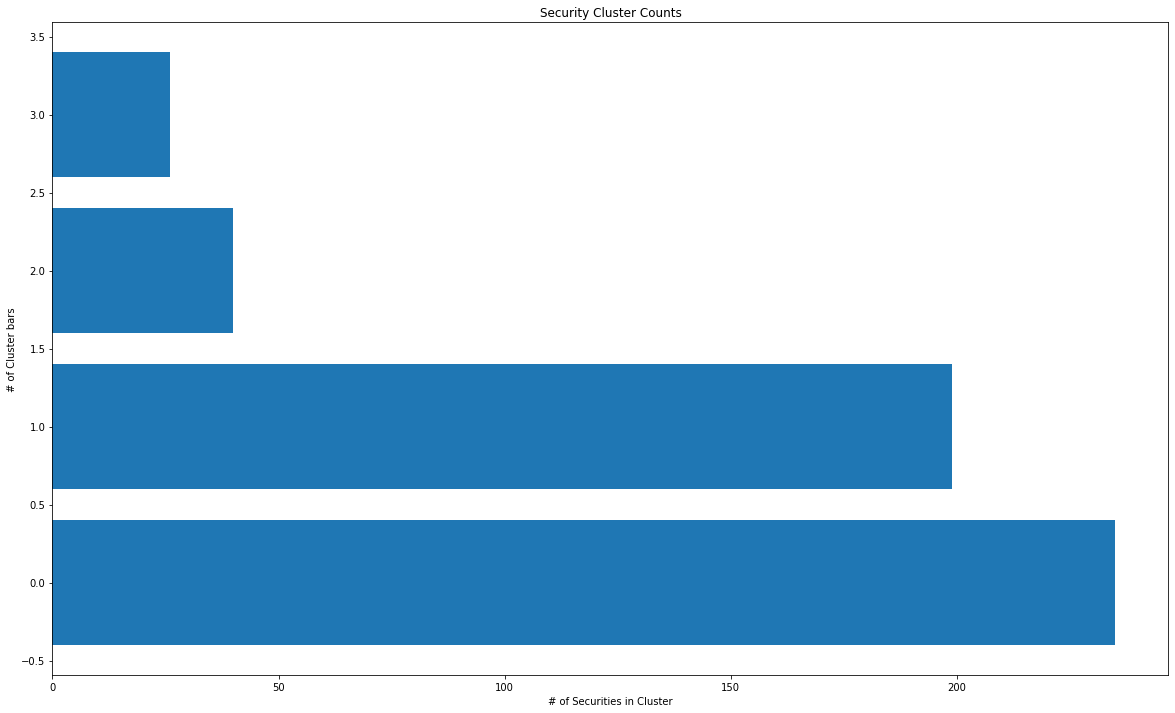

In [51]:
plt.figure(figsize=(20,12))
plt.barh(range(len(series.value_counts())),series.value_counts())
plt.title('Security Cluster Counts')
plt.xlabel('# of Securities in Cluster')
plt.ylabel('# of Cluster bars')

In [52]:
cluster_size_limit = 1000
counts = series.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 4
Number of Pairs: 96602


In [53]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [54]:
from statsmodels.tsa.stattools import coint
cluster_dict = {}
for i, which_clust in enumerate(ticker_count.index):
    tickers = clustered_series[clustered_series == which_clust].index   
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        df[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [55]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [56]:
print ("Number of pairs found : %d" % len(pairs))
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)))

Number of pairs found : 38
In those pairs, there are 41 unique tickers.


In [57]:
pairs

[('ABT', 'AXP'),
 ('ABT', 'CSCO'),
 ('ABT', 'GLW'),
 ('ABT', 'HAS'),
 ('ABT', 'HPE'),
 ('ABT', 'JPM'),
 ('ABT', 'MKC'),
 ('ABT', 'NTRS'),
 ('ABT', 'NLOK'),
 ('ABT', 'PRU'),
 ('ABT', 'USB'),
 ('ABMD', 'AMZN'),
 ('ABMD', 'DXCM'),
 ('ABMD', 'HCA'),
 ('AOS', 'ADBE'),
 ('AOS', 'GOOGL'),
 ('AOS', 'GOOG'),
 ('AOS', 'ANSS'),
 ('AOS', 'AMAT'),
 ('AOS', 'BBY'),
 ('AOS', 'BIO'),
 ('AOS', 'COF'),
 ('AOS', 'CHTR'),
 ('AOS', 'XRAY'),
 ('AOS', 'EBAY'),
 ('AOS', 'EL'),
 ('AOS', 'ISRG'),
 ('AOS', 'LRCX'),
 ('AOS', 'LYV'),
 ('AOS', 'NKE'),
 ('AOS', 'PNR'),
 ('AOS', 'PKI'),
 ('AOS', 'QRVO'),
 ('AOS', 'QCOM'),
 ('AOS', 'CRM'),
 ('AOS', 'STX'),
 ('AOS', 'STT'),
 ('AOS', 'WST')]

In [58]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=X.index, data=X).T

In [59]:
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.T.loc[stocks]

In [60]:
X_tsne = TSNE(learning_rate=50, perplexity=3, init='pca').fit_transform(X_pairs)

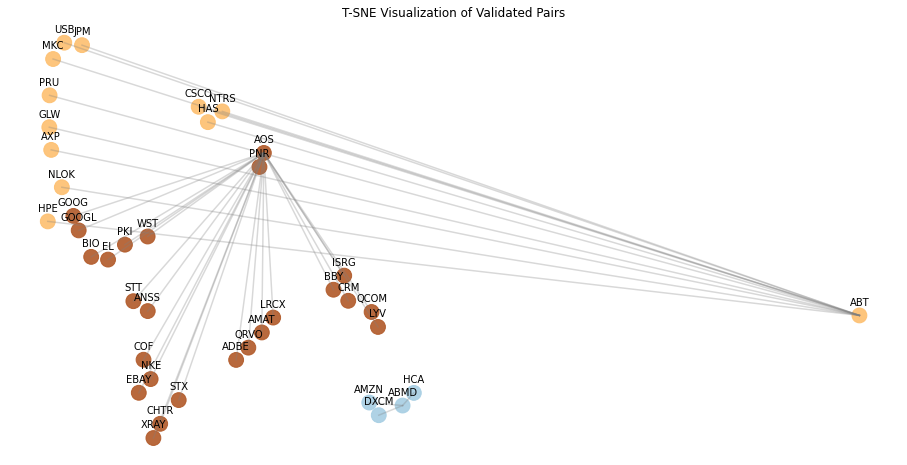

In [61]:
plt.figure(1, facecolor='white',figsize=(16,8))
plt.clf()
plt.axis('off')
for pair in pairs:
    #print(pair[0])
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    #print(ticker1, loc1)

    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
      
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='gray');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=220, alpha=0.9, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('T-SNE Visualization of Validated Pairs'); 

# zip joins x and y coordinates in pairs
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


The TSNE visualization shown above tells me the securities pairing to consider when formulating a strategy. Clustering techniques doesn't tell us the prediction/forecasting of a stock; but rather inferring which securities to buy/sell together as a pair. This is great for building a risk portfolio and potentially have good returns in the long run. We were able to find the number of clusters for the K-Means through the silhouette visualization and the Inertia graph, as well as building a hierarchy graph for the Agglomerative Clustering technique. A bonus that was not mentioned in depth was the Affinity Propagation. I've also performed PCA on the Supervised Learning Regression course, which was used for Dimensionality Reduction.